In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
Health=pd.read_excel('Health.xlsx')
Health.head()

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,ehtemal voghu bimari ghalbi
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
Health=Health.rename(columns={'ehtemal voghu bimari ghalbi':'Outcome'})
Health.head(3)

,sen,jens,dard ghafase sineh,feshar khun dar halat esterahat,kolestrol,ghand khun nashta,navar ghalb dar halat esterahat,hadaksar zaraban ghalb,anjin sadri nashi az varzesh,afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat,shibe tamrin dar oje tamrin dar maghtae ST,tedad oroghe bozorg rangi ba flourosopy,talasemi,Outcome
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1


In [4]:
from sklearn.model_selection import train_test_split
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
y=Health['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

In [5]:
#Univariate Selection
#Statistical tests can be used to select those features that have the strongest relationship with the output variable.
#The scikit-learn library provides the SelectKBest class that can be used with a suite of different 
    #statistical tests to select a specific number of features.
    

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
dataframe = pandas.read_excel('Health.xlsx')
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[4.138e+00 1.979e+00 1.244e+01 3.154e+00 1.139e+01 2.026e-04 1.971e+00
 1.539e+02]
[[ 63.   1. 233. 150.]
 [ 67.   4. 286. 108.]
 [ 67.   4. 229. 129.]
 [ 37.   3. 250. 187.]
 [ 41.   2. 204. 172.]]


In [6]:
#Recursive Feature Elimination
#The Recursive Feature Elimination (or RFE) works by recursively removing 
    #attributes and building a model on those attributes that remain.
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

dataframe = pandas.read_excel('Health.xlsx')
array = dataframe.values
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
Y=Health['Outcome']
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, Y)
print("Num Features: %d")
print(fit.n_features_)
print("Selected Features: %s")
print(fit.support_)
print("Feature Ranking: %s")
print(fit.ranking_)

Num Features: %d
8
Selected Features: %s
[False  True  True False False  True  True  True  True  True False  True]
Feature Ranking: %s
[4 1 1 3 5 1 1 1 1 1 2 1]


In [7]:
# Principal Component Analysis
#Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
dataframe = pandas.read_excel('Health.xlsx')
array = dataframe.values
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
Y=Health['Outcome']
#X = array[:,0:8]
#Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X,Y)
# summarize components
print("Explained Variance: %s")
print(fit.explained_variance_ratio_)
print()
print(fit.components_)

Explained Variance: %s
[0.746 0.15  0.086]

[[ 3.713e-02 -1.790e-03  1.337e-03  5.130e-02  9.980e-01  1.129e-04
   3.211e-03 -1.915e-03  5.524e-04  9.715e-04 -6.733e-05  5.327e-04]
 [ 1.816e-01  1.065e-03  1.361e-02  1.154e-01 -1.463e-02  4.898e-04
   3.753e-03 -9.758e-01  7.665e-03  1.823e-02  1.052e-02  2.384e-02]
 [ 1.263e-01 -1.325e-03 -5.615e-03  9.803e-01 -5.486e-02  3.663e-03
   6.614e-03  1.407e-01 -1.956e-04  8.750e-03  2.130e-03  1.029e-02]]


In [9]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(pca.explained_variance_ratio_)  # doctest: +ELLIPSIS

[0.746 0.15 ]


In [11]:
print(pca.singular_values_)  # doctest: +ELLIPSIS

[896.226 401.501]


In [12]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

[25.89 37.5  46.42 54.57 61.71 67.95 74.06 79.63 84.6  88.66 91.93 95.
 97.62]


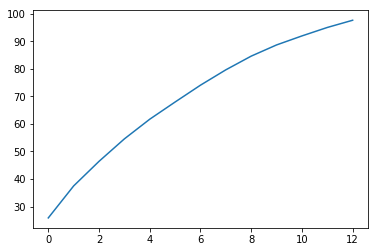

In [18]:
from sklearn.decomposition import PCA
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import scale
 
%matplotlib inline
 
#Load data set
 
#convert it to numpy arrays
 
X=Health.values
 
#Scaling the values
 
X = scale(X)
 
pca = PCA(n_components=13)
 
pca.fit(X)
 
#The amount of variance that each PC explains
 
var= pca.explained_variance_ratio_
 
#Cumulative Variance explains
 
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
 
print (var1)
 

 
plt.plot(var1)

In [8]:
#Feature Importance
#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
dataframe = pandas.read_excel('Health.xlsx')
array = dataframe.values
X=Health[['sen','jens','dard ghafase sineh','feshar khun dar halat esterahat','kolestrol','ghand khun nashta','navar ghalb dar halat esterahat','hadaksar zaraban ghalb','anjin sadri nashi az varzesh','afsordegi st nashi az tamrin va varzesh nesbat be halat esterahat','shibe tamrin dar oje tamrin dar maghtae ST','talasemi']]
Y=Health['Outcome']
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print('feature_importances_')
print(model.feature_importances_)

feature_importances_
[0.091 0.046 0.121 0.084 0.074 0.02  0.033 0.085 0.073 0.108 0.071 0.196]
